In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os

In [ ]:
#Open the CSV file
lung_df = pd.read_csv('../data/lung_disease_data.csv')

lung_df.head(50)


In [ ]:
##Data Cleaning

#Drops duplicate rows
lung_df.drop_duplicates

#Makes a list of the categorical columns
columns = ['Gender', 'Smoking Status', 'Disease Type', 'Treatment Type', 'Recovered']

#Drops the na values in the specified columns
lung_df = lung_df.dropna(subset=columns)

#Checks if they are still null
print(lung_df.isnull().sum())

#For the other columns, fills the na values with the median of that column
lung_df['Lung Capacity'].fillna(lung_df['Lung Capacity'].median(), inplace=True)
lung_df['Hospital Visits'].fillna(lung_df['Hospital Visits'].median(), inplace=True)
lung_df['Age'].fillna(lung_df['Age'].median(), inplace=True)

#Reset the index column after dropping rows
lung_df.reset_index(drop=True, inplace=True)

#Check all columns should all have no null values
print(lung_df.isnull().sum())

#Check the data types of the columns
print(lung_df.dtypes)

lung_df


In [18]:
##Target Variable EDA

#Quantative analysis of the target variable 'Recovered'
print(lung_df['Recovered'].value_counts())
print(lung_df['Recovered'].value_counts(normalize=True) * 100)


#Visualize the distribution of the target variable 'Recovered'
sns.countplot(x='Recovered', data=lung_df)
plt.title('Distribution of Recovered Patients')
plt.xlabel('Recovered')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../output/recovered_distribution.png')
plt.close()

Recovered
Yes    1944
No     1919
Name: count, dtype: int64
Recovered
Yes    50.323583
No     49.676417
Name: proportion, dtype: float64


In [20]:
##Age Analysis

#Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(data=lung_df, x='Age', bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('../output/age_distribution.png')
plt.close()

#Boxplot of Age by Recovered status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recovered', y='Age', data=lung_df)
plt.title('Age Distribution by Recovered Status')
plt.xlabel('Recovered')
plt.ylabel('Age')
plt.tight_layout()
plt.savefig('../output/age_distribution_by_recovered.png')
plt.close() 

# Mean/median age by recovery status
grouped_age = lung_df.groupby('Recovered')['Age'].agg(['mean', 'median']).reset_index()
print(grouped_age)

#Binning Age into categories
bins = [0, 40, 60, 100]
labels = ['Young', 'Middle-Aged', 'Senior']
lung_df['Age Group'] = pd.cut(lung_df['Age'], bins=bins, labels=labels, right=False)

# Count of patients in each age group
age_group_recovery_crosstab = pd.crosstab(lung_df['Age Group'], lung_df['Recovered'])
age_group_recovery_crosstab.index.name = None
print(age_group_recovery_crosstab)
# Visualize the age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', data=lung_df, order=labels, hue ='Recovered')
plt.title('Age Group Distribution by Recovery Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../output/age_group_distribution_by_recovered.png')
plt.close()



  Recovered       mean  median
0        No  54.415842    54.0
1       Yes  54.244856    54.0
Recovered     No  Yes
Young        524  515
Middle-Aged  621  674
Senior       774  755


In [21]:
##Gender Analysis

#Count by gender
sns.countplot(x='Gender', data=lung_df)
plt.title('Countplot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../output/gender_distribution.png')
plt.close()


#Gender distribution by recovery status
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=lung_df, hue='Recovered')
plt.title('Gender Distribution by Recovery Status')
plt.tight_layout()
plt.savefig('../output/gender_distribution_by_recovered.png')
plt.close()

#Crosstab

gender_recovery_crosstab = pd.crosstab(lung_df['Gender'], lung_df['Recovered'])
gender_recovery_crosstab.index.name = None
print(gender_recovery_crosstab)

Recovered   No  Yes
Female     961  994
Male       958  950


In [ ]:
#Smoking Status Analysis

#Gender distribution by recovery status
plt.figure(figsize=(10, 6))
sns.countplot(x='Smoking Status', data=lung_df, hue='Recovered')
plt.title('Smoking Status Distribution by Recovery')

#Crosstab

smoking_status_recovery_crosstab = pd.crosstab(lung_df['Smoking Status'], lung_df['Recovered'])
smoking_status_recovery_crosstab.index.name = None
print(smoking_status_recovery_crosstab)

In [ ]:
##Disease Type Analysis

#Count by disease type
plt.figure(figsize=(10, 6))
sns.countplot(x='Disease Type', data=lung_df)
plt.title('Count of Disease Types')
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.show()
#Disease type distribution by recovery status
plt.figure(figsize=(10, 6))
sns.countplot(x='Disease Type', data=lung_df, hue='Recovered')
plt.title('Disease Type Distribution by Recovery Status')
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.show()

#Crosstab
disease_recovery_crosstab = pd.crosstab(lung_df['Disease Type'], lung_df['Recovered'])
disease_recovery_crosstab.index.name = None
print(disease_recovery_crosstab)


In [ ]:
##Disease Type Analysis

#Count by disease type
plt.figure(figsize=(10, 6))
sns.countplot(x='Disease Type', data=lung_df)
plt.title('Count of Disease Types')
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.show()
#Disease type distribution by recovery status
plt.figure(figsize=(10, 6))
sns.countplot(x='Disease Type', data=lung_df, hue='Recovered')
plt.title('Disease Type Distribution by Recovery Status')
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.show()

#Crosstab
disease_recovery_crosstab = pd.crosstab(lung_df['Disease Type'], lung_df['Recovered'])
disease_recovery_crosstab.index.name = None
print(disease_recovery_crosstab)


Recovered    No   Yes
Low        1037  1018
Medium      343   353
High        539   570


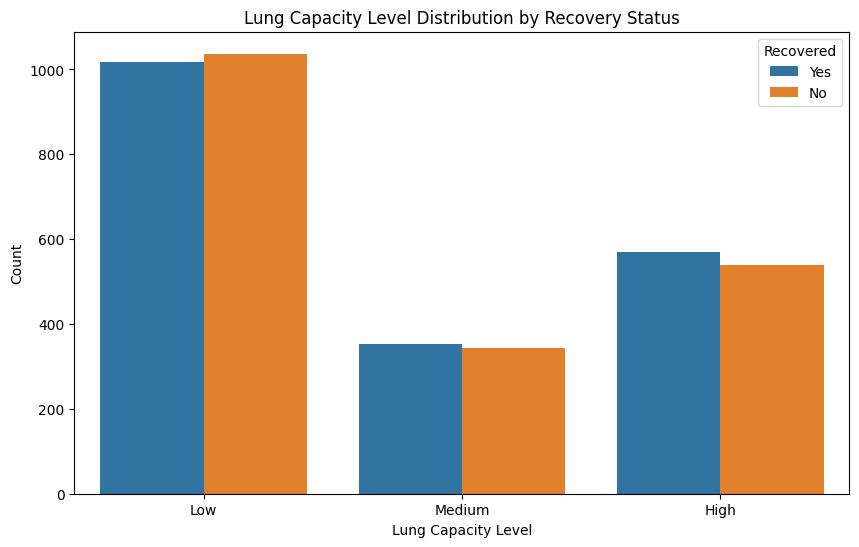

In [22]:
##Lung Capacity Analysis

#Histogram of Lung Capacity
plt.figure(figsize=(10, 6))
sns.histplot(data=lung_df, x='Lung Capacity', bins=20, kde=True)
plt.title('Lung Capacity Distribution of Patients')
plt.xlabel('Lung Capacity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('../output/lung_capacity_distribution.png')
plt.close() 

#Boxplot of Age by Recovered status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recovered', y='Lung Capacity', data=lung_df)
plt.title('Lung Capacity Distribution by Recovered Status')
plt.xlabel('Recovered')
plt.ylabel('Lung Capacity')
plt.tight_layout()
plt.savefig('../output/lung_capacity_distribution_by_recovered.png')
plt.close() 


#Binning Lung Capacity into categories
bins = [0, 3.5, 4.5, 6]
labels = ['Low', 'Medium', 'High']
lung_df['LungCapacity_Level'] = pd.cut(lung_df['Lung Capacity'], bins=bins, labels=labels, right=False)

# Count of patients in each lung capacity level
lung_capacity_recovery_crosstab = pd.crosstab(lung_df['LungCapacity_Level'], lung_df['Recovered'])
lung_capacity_recovery_crosstab.index.name = None
print(lung_capacity_recovery_crosstab)

# Visualize the levels of lung capacity
plt.figure(figsize=(10, 6))
sns.countplot(x='LungCapacity_Level', data=lung_df, order=labels, hue ='Recovered')
plt.title('Lung Capacity Level Distribution by Recovery Status')
plt.xlabel('Lung Capacity Level')
plt.ylabel('Count')
plt.show()


In [ ]:
##Healthcare Utilization Analysis

#Hospital visits Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=lung_df, x='Hospital Visits', bins=20, kde=True)
plt.title('Hospital Visits Distribution')
plt.xlabel('Hospital Visits')
plt.ylabel('Frequency')
plt.show()

#Boxplot of Hospital Visits by Recovered status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recovered', y='Hospital Visits', data=lung_df)
plt.title('Hospital Visits by Recovered Status')
plt.xlabel('Recovered')
plt.ylabel('Hospital Visits')
plt.show()

#Binning Hospital Visits into categories
bins = [0, 3, 7, 16]
labels = ['Low Usage', 'Moderate', 'High Usage']
lung_df['Visit_Tier'] = pd.cut(lung_df['Hospital Visits'], bins=bins, labels=labels, right=False)

# Count of patients in each hospital visit tier
hospital_visits_recovery_crosstab = pd.crosstab(lung_df['Visit_Tier'], lung_df['Recovered'])
hospital_visits_recovery_crosstab.index.name = None
print(hospital_visits_recovery_crosstab)

# Visualize the tiers of hospital visits
plt.figure(figsize=(10, 6))
sns.countplot(x='Visit_Tier', data=lung_df, order=labels, hue ='Recovered')
plt.title('Hospital Visits Level Distribution by Recovery Status')
plt.xlabel('Hospital Visits Level')
plt.ylabel('Count')
plt.show()



In [15]:
# Save the cleaned DataFrame to a new CSV file
lung_df.to_csv('../data/lung_disease_clean.csv', index=False)
